<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/08-09sep/TareaSep09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tipos de Variables
-Cateogoricas
     --Ordinales
       --Siguen un orden especifico (chico, mediano, grande)
     --Nominales
       --Caracteristicas que no tienen una clacificacion u orden especifico (Colores)
     --Binarias
       --Solo 2 opciones
                              ++ Histogramas
                              ++ Box plots
                              ++ Pie plots
                              ++ Vain plots
      ** Pasar a bianrio para poder trabajar las variables como discretas
      ** Get dummy pasa las caracteristicas a binario
-Numericas
     --Discretas
       --Puede tomar cualquier valor de los reales  (Valores enteros)
     --Continuas
       --Pueden tomar cualquier valor de los reales


In [71]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [97]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("/content/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


https://stackoverflow.com/questions/61348016/what-does-dataframe-select-dtypesexclude-object-actually-do


Separar variables numericas y categoricas por medio de pandas

In [98]:
#Separar variables Categoricas y numericas por medio de pandas
#
Categoricas = df.select_dtypes(include = ['object'])
Numericas = df.select_dtypes(exclude = ['object'])

In [103]:
Categoricas.head(5)


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [156]:
Numericas.head(5)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


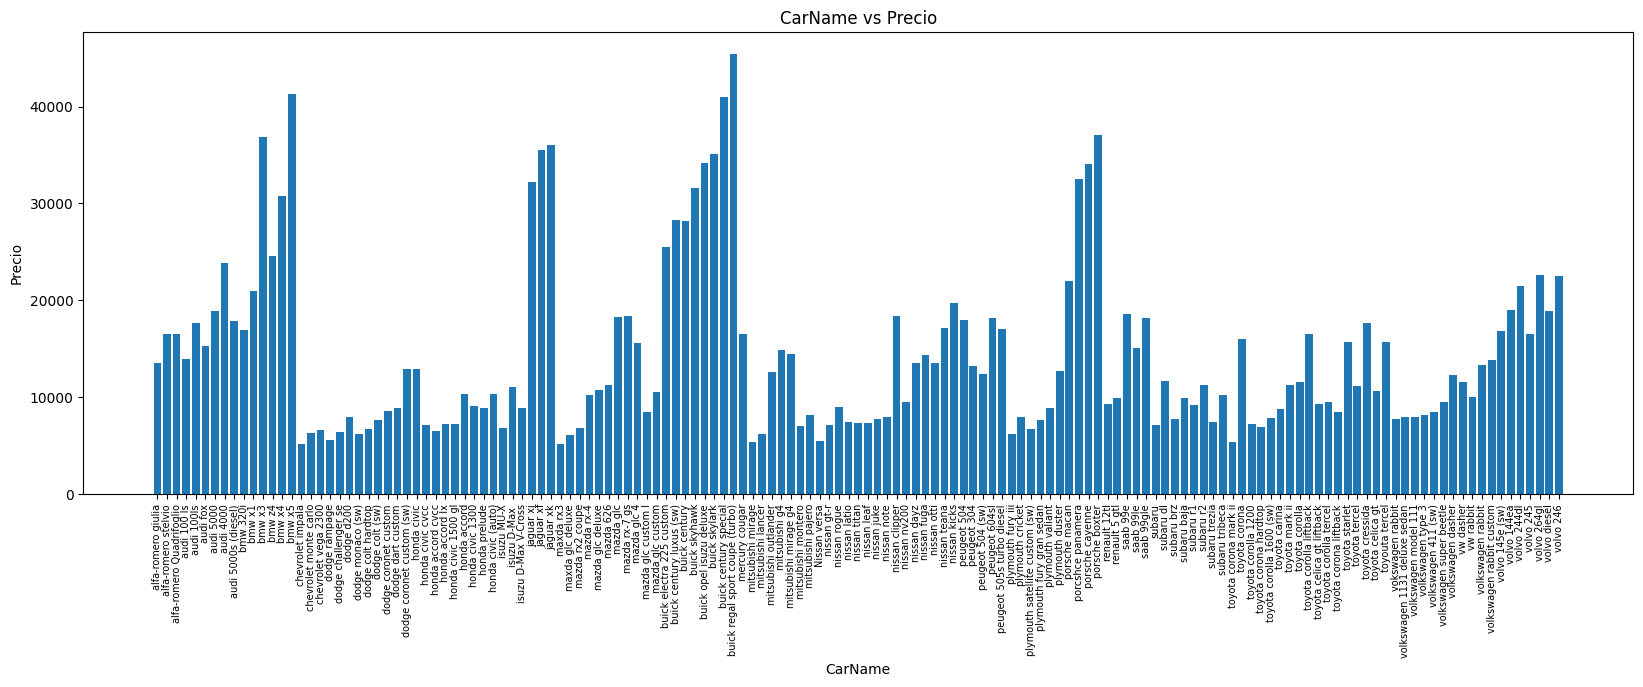

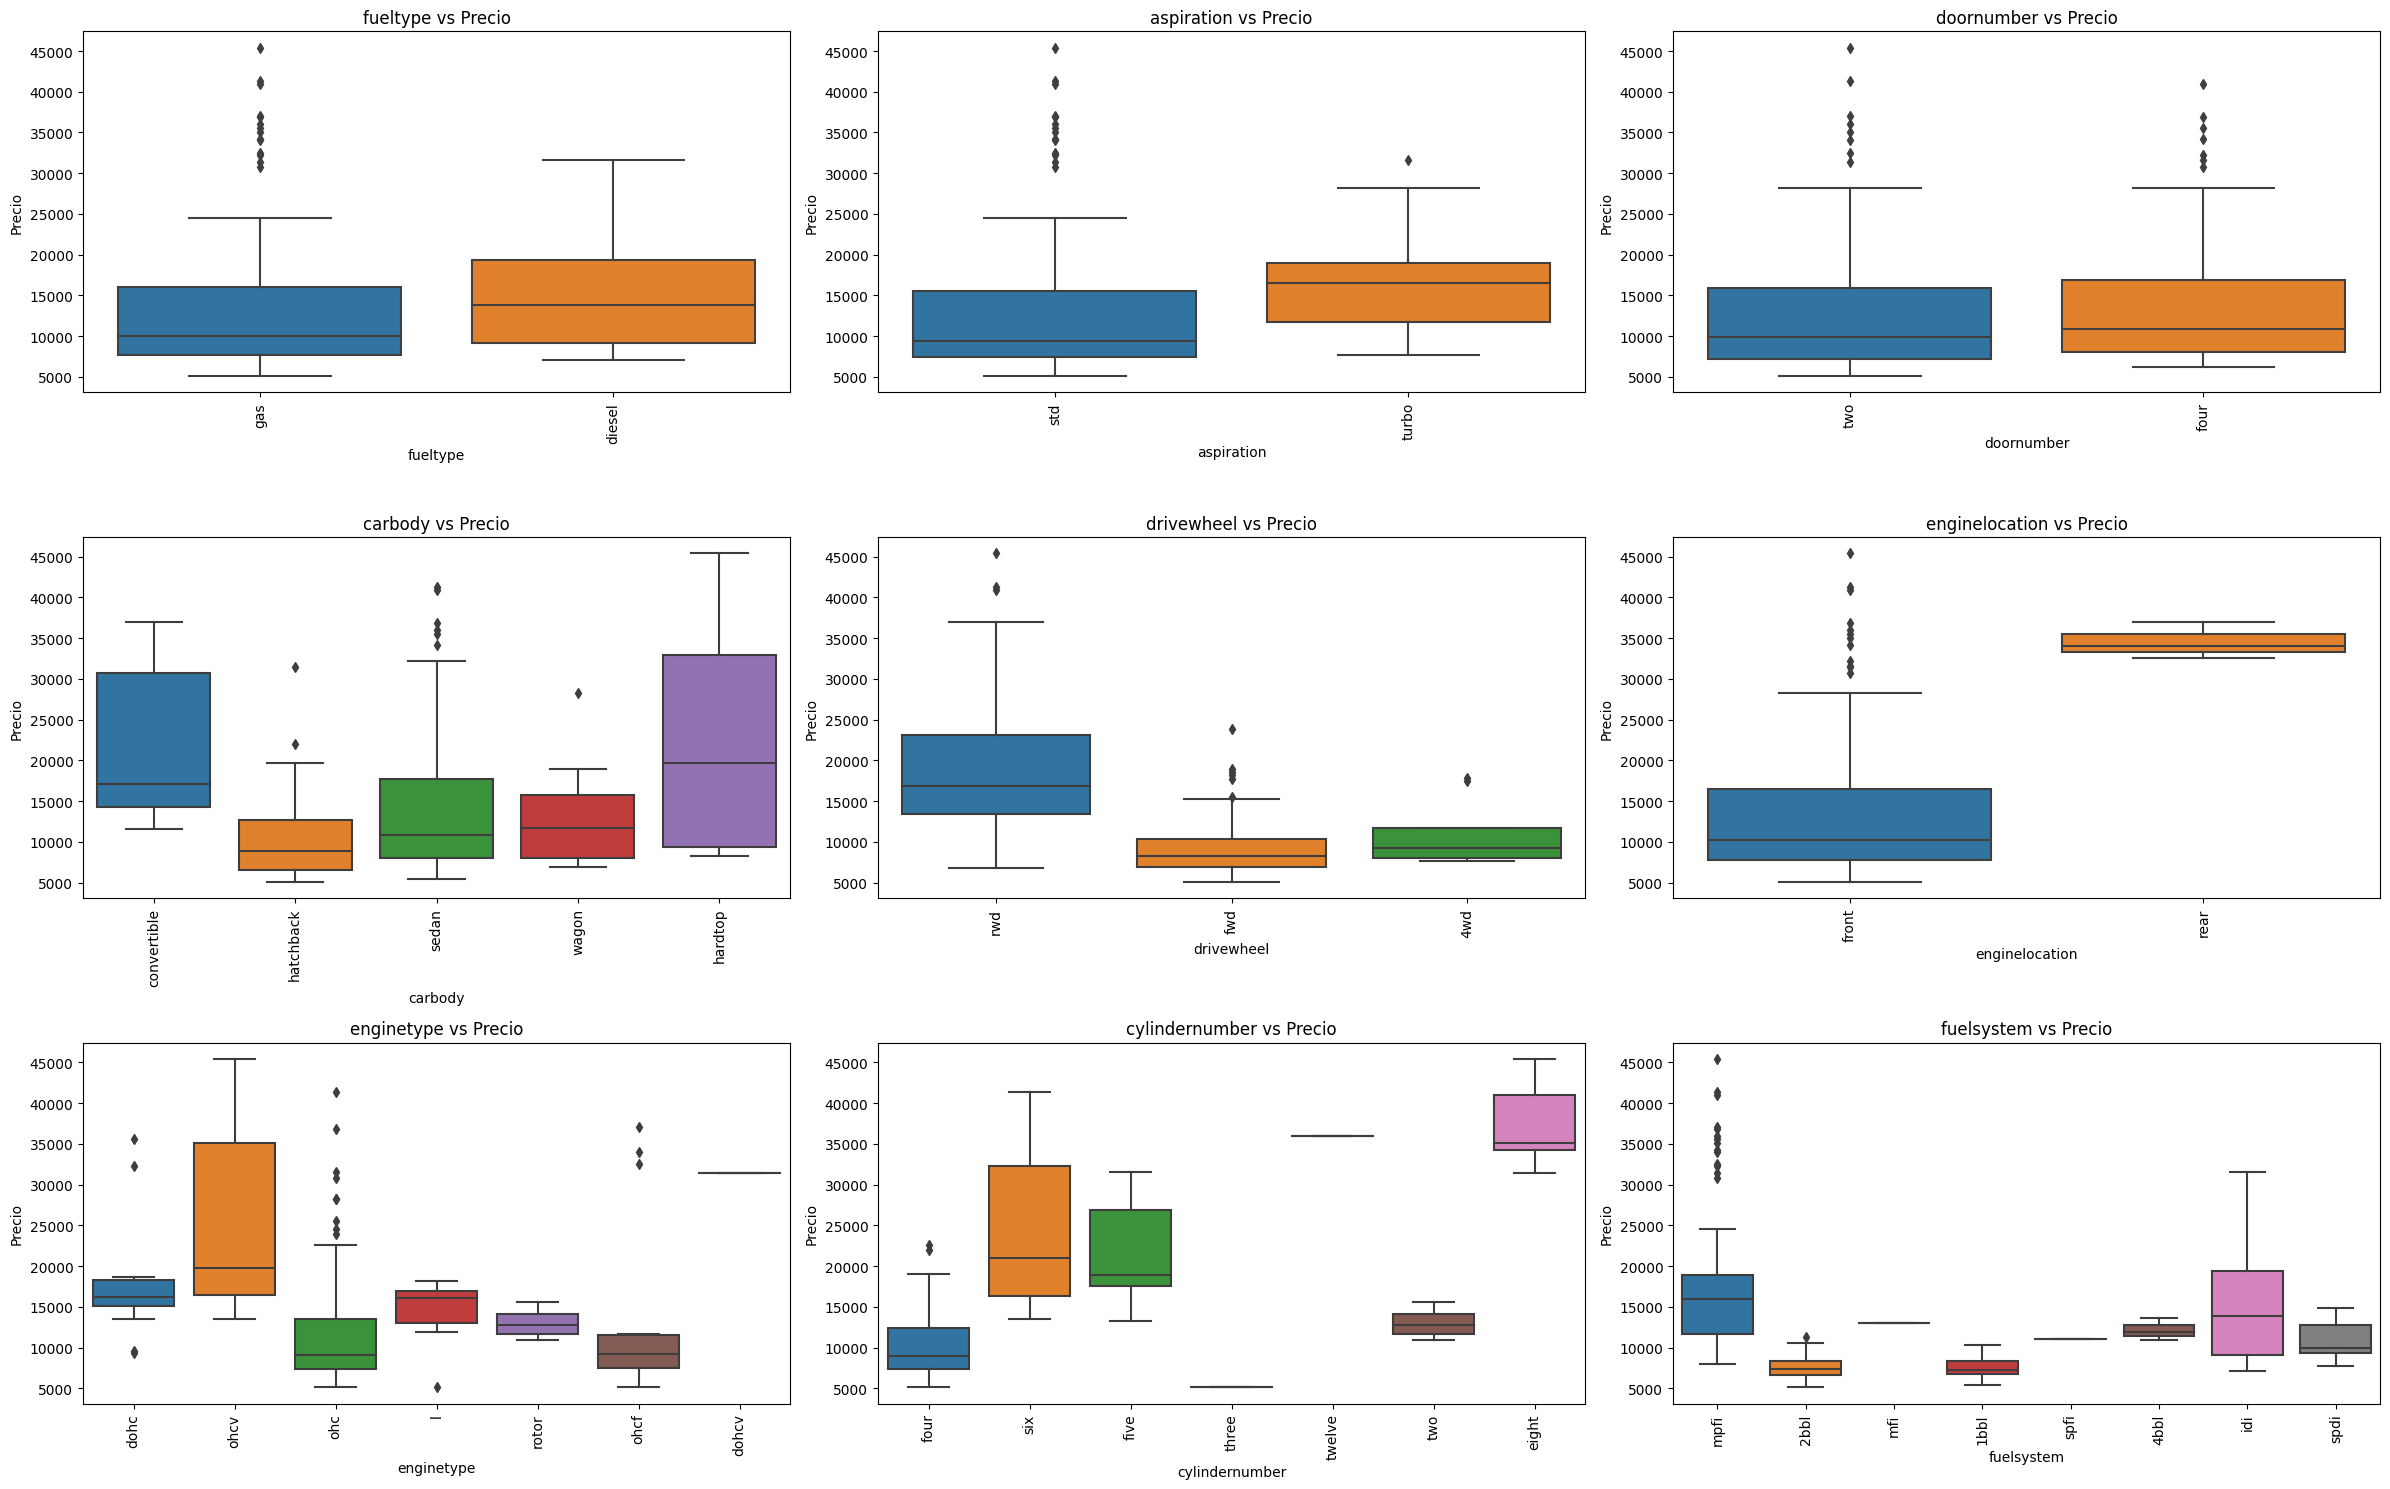

In [157]:
Price =Numericas['price']

#Crear subgraficos excepto para CarName, daddo que es muy amplia no se creara una sibgrafica para esa. necesitamos 9 subgraficas para cadacolumna
num_filas = 3
num_columnas = 3

# Crea una matriz de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(24, 15))
# Aplanamos la matriz de subgráficos para iterar sobre ella
axs = axs.flatten()

# Grafica la columna 'CarName' en una sola gráfica grande
plt.figure(figsize=(20, 6))
plt.bar(df['CarName'], Price)
plt.xlabel('CarName')
plt.ylabel('Precio')
plt.title('CarName vs Precio')
plt.xticks(rotation=90, fontsize = 7)

categoricas = Categoricas.drop(columns=['CarName'])
num_subplots = min(len(categoricas.columns), num_filas * num_columnas)
for i in range(num_subplots):
    plt.sca(axs[i])
    columna = categoricas.columns[i]
    sns.boxplot(x=columna, y='price', data=df)
    plt.xlabel(columna)
    plt.ylabel('Precio')
    plt.title(f'{columna} vs Precio')
    plt.xticks(rotation=90)

# Ajusta el espacio entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


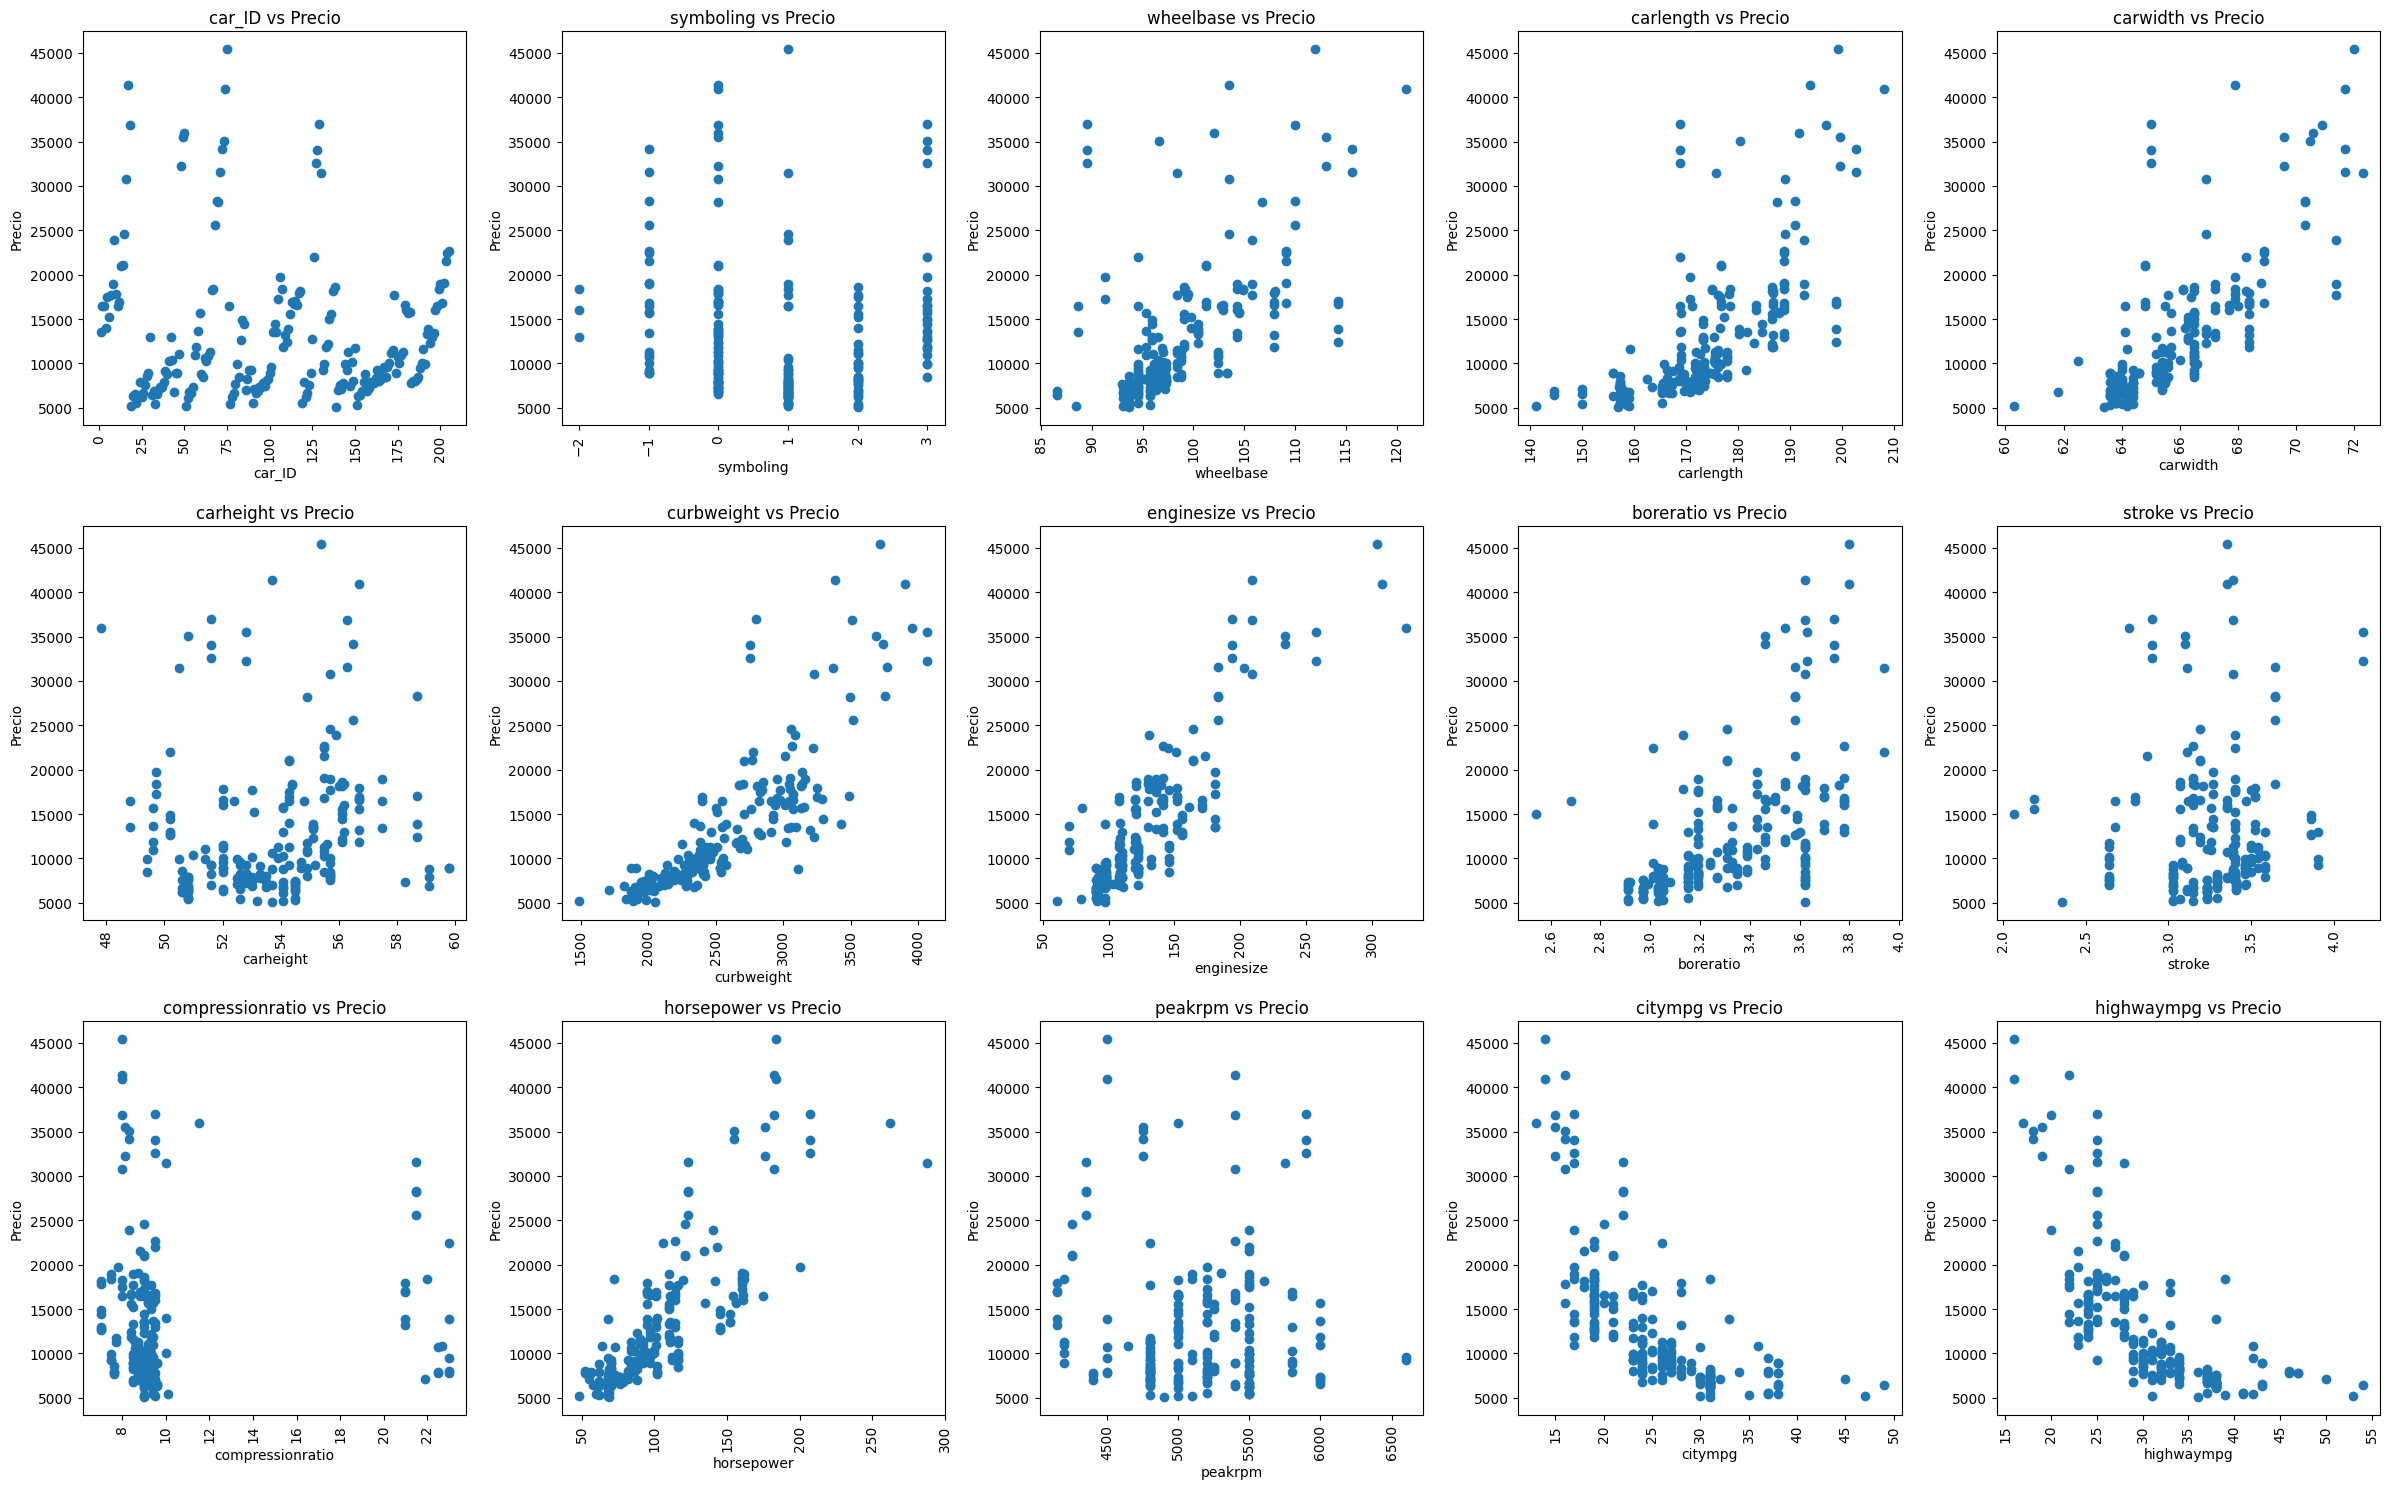

In [158]:
# Crear subgráficos excepto para CarName, dado que es muy amplia no se creará una subgráfica para esa. Necesitamos 15 subgráficos para cada columna
num_filas_n = 3
num_columnas_n = 5

# Crea una matriz de subgráficos
fig, axs = plt.subplots(num_filas_n, num_columnas_n, figsize=(24, 15))
# Aplanamos la matriz de subgráficos para iterar sobre ella
axs = axs.flatten()

num_subplots = min(len(Numericas.columns), num_filas_n * num_columnas_n)
for i in range(num_subplots):
    plt.sca(axs[i])
    columna = Numericas.columns[i]
    plt.scatter(df[columna], Price)
    plt.xlabel(columna)
    plt.ylabel('Precio')
    plt.title(f'{columna} vs Precio')
    plt.xticks(rotation=90)


# Ajusta el espacio entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

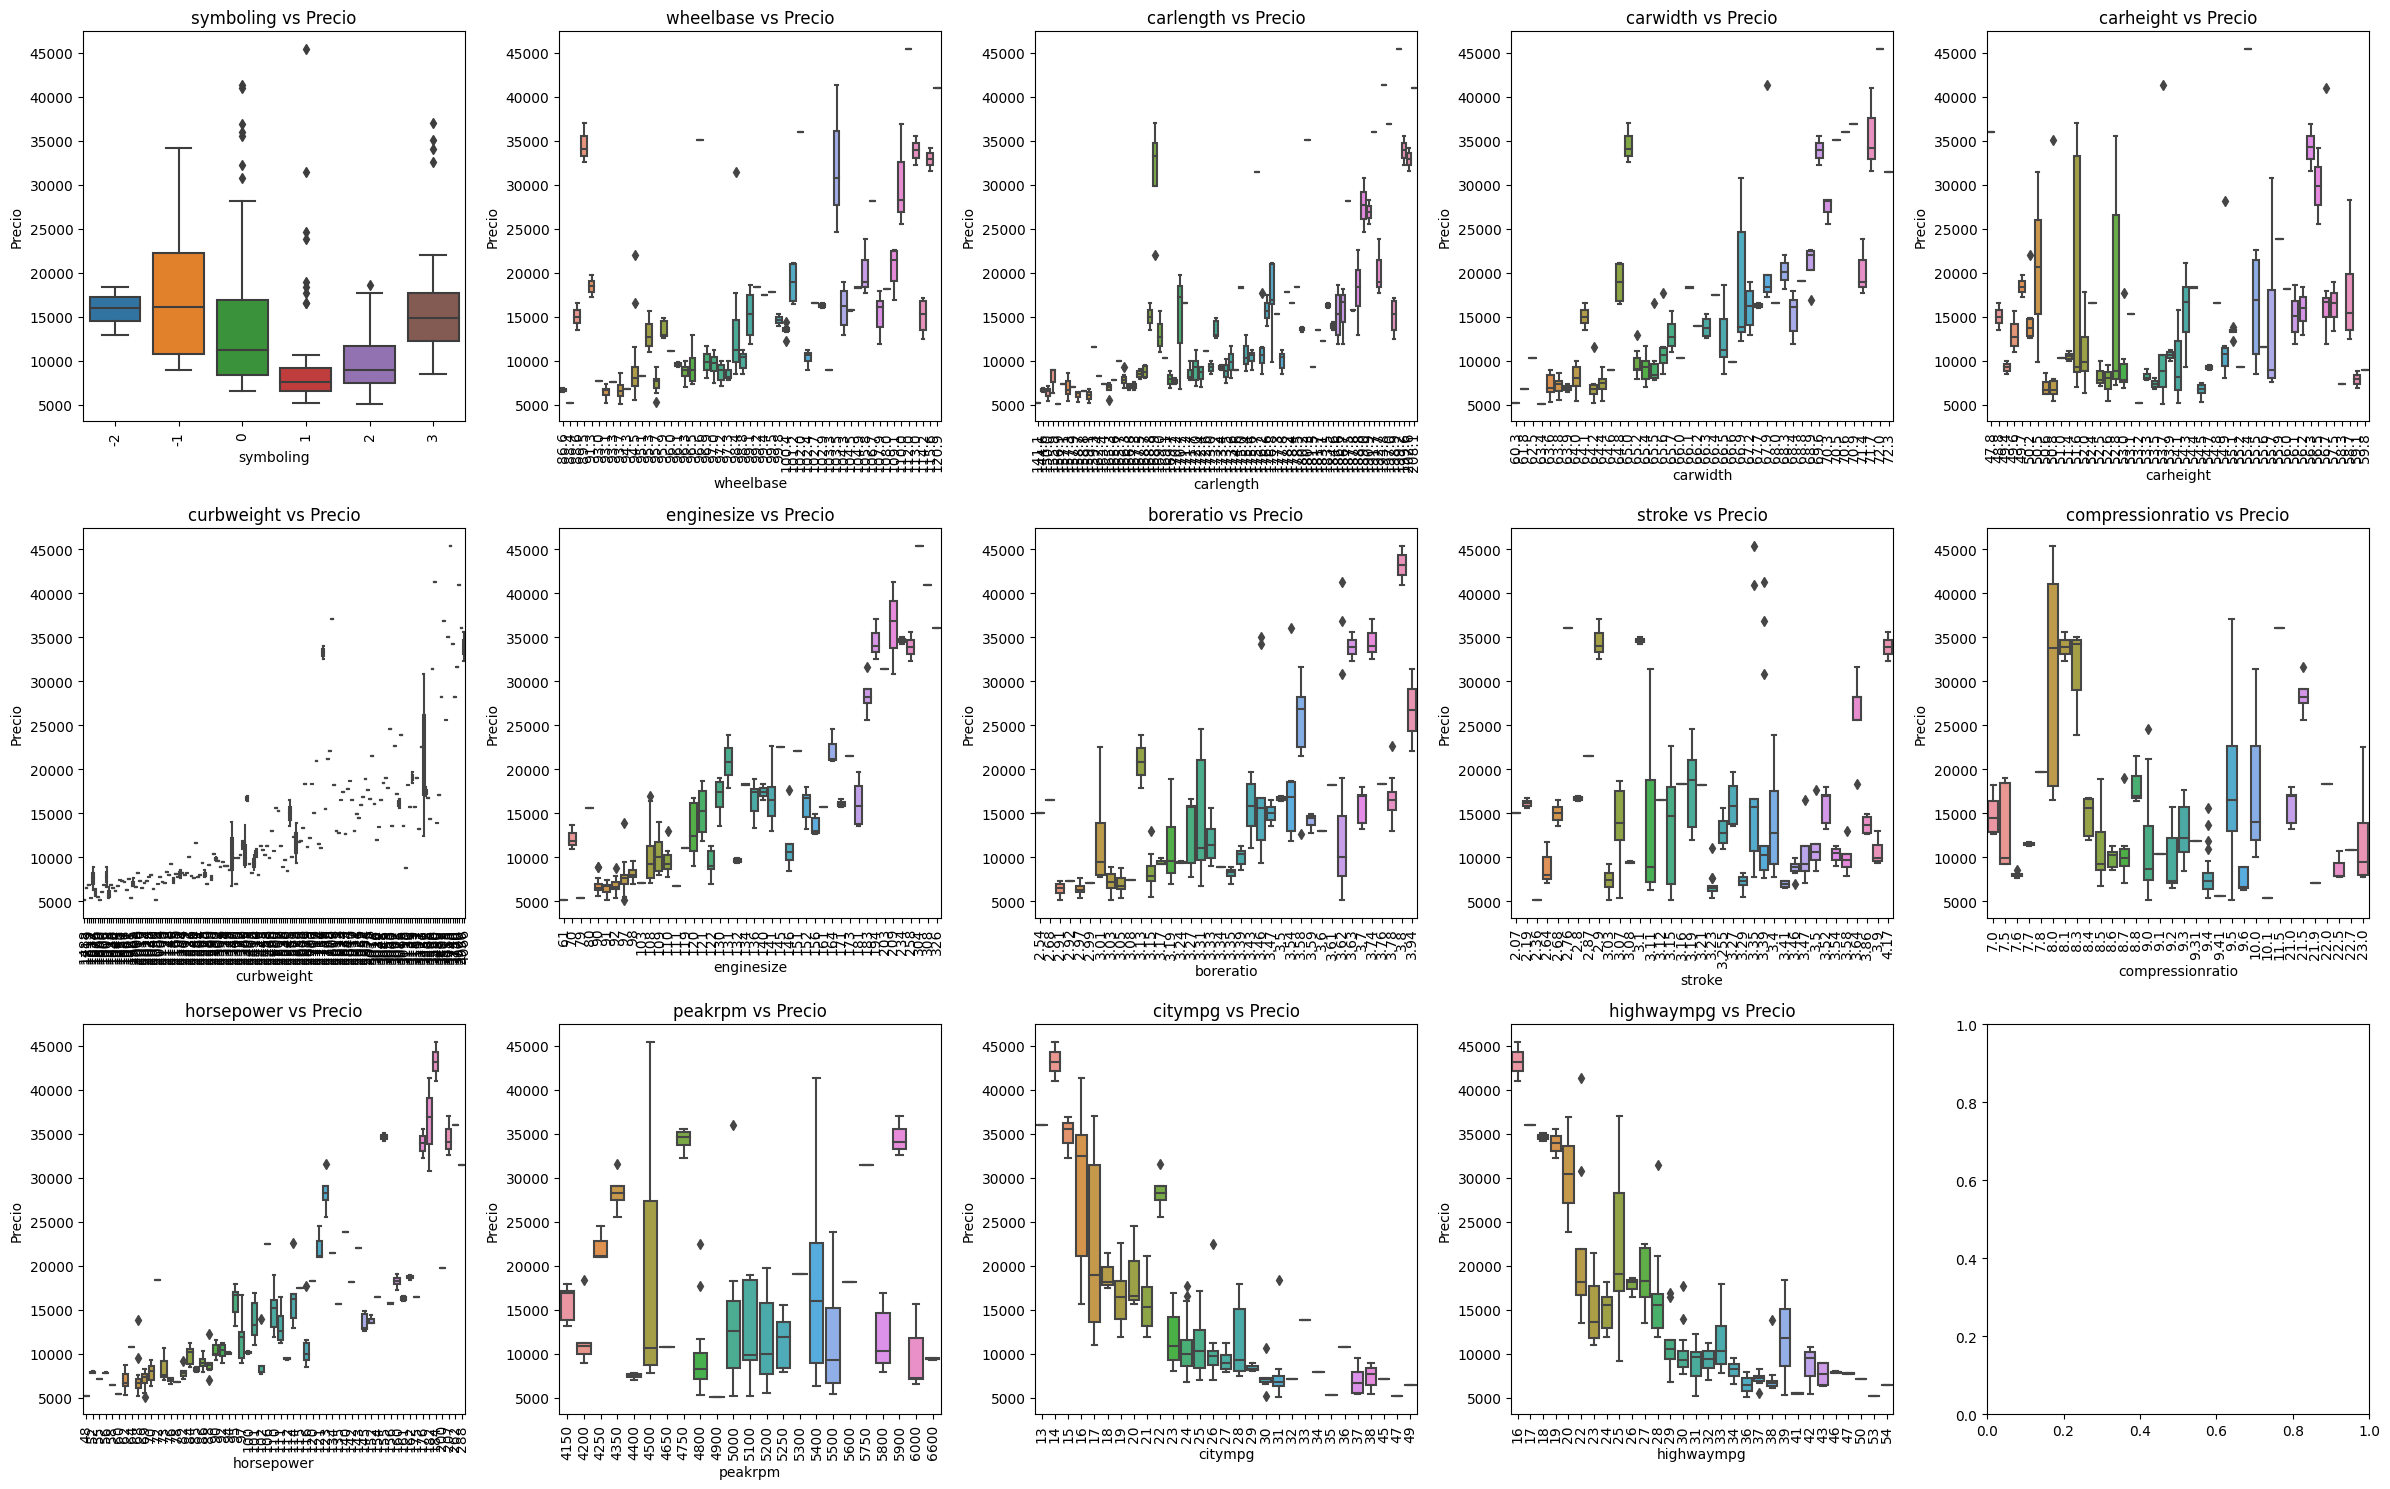

In [159]:
# Crear subgráficos excepto para CarName, dado que es muy amplia no se creará una subgráfica para esa. Necesitamos 15 subgráficos para cada columna
Numericas = Numericas.iloc[:, 1: -1]  # Esto excluye la primera columna

num_filas_n = 3
num_columnas_n = 5

# Crea una matriz de subgráficos
fig, axs = plt.subplots(num_filas_n, num_columnas_n, figsize=(24, 15))
# Aplanamos la matriz de subgráficos para iterar sobre ella
axs = axs.flatten()

num_subplots = min(len(Numericas.columns), num_filas_n * num_columnas_n)
for i in range(num_subplots):
    plt.sca(axs[i])
    columna = Numericas.columns[i]
    sns.boxplot(x=columna, y='price', data=df)
    plt.xlabel(columna)
    plt.ylabel('Precio')
    plt.title(f'{columna} vs Precio')
    plt.xticks(rotation=90)


# Ajusta el espacio entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


In [108]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=['horsepower', 'enginesize', 'price']
categorical_vars=['doornumber', 'cylindernumber']

In [109]:


# Selecciona las variables numéricas y categóricas del DataFrame
DataFrame = df[use_vars + categorical_vars]

# Convierte las variables categóricas en variables "dummy"
DataFrame = pd.get_dummies(DataFrame, columns=categorical_vars, drop_first=True)

# Ahora df contiene las variables numéricas seleccionadas y las variables categóricas convertidas en "dummy"
DataFrame


,horsepower,enginesize,price,doornumber_two,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,111,130,13495.0,1,0,1,0,0,0,0
1,111,130,16500.0,1,0,1,0,0,0,0
2,154,152,16500.0,1,0,0,1,0,0,0
3,102,109,13950.0,0,0,1,0,0,0,0
4,115,136,17450.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200,114,141,16845.0,0,0,1,0,0,0,0
201,160,141,19045.0,0,0,1,0,0,0,0
202,134,173,21485.0,0,0,0,1,0,0,0
203,106,145,22470.0,0,0,0,1,0,0,0


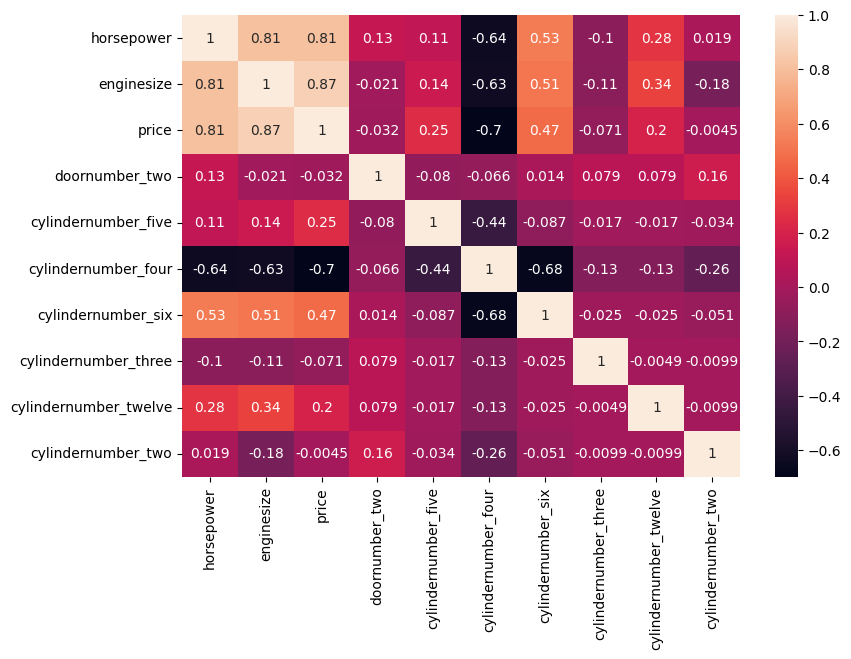

In [110]:
# Calcula la matriz de correlación entre todas las variables en DataFrame
correlation_matrix = DataFrame.corr()

# Crea una figura y un eje para el mapa de calor
fig, ax = plt.subplots(figsize=(9, 6))

# Crea el mapa de calor y muestra los valores de correlación
sns.heatmap(correlation_matrix, annot=True, ax=ax)

# Muestra el mapa de calor
plt.show()

In [160]:
th = DataFrame['price']
xh = DataFrame.drop(columns=['price'])
labels=["horsepower","enginesize","doornumber_two","cylin_five", "cylin_four", "cylin_six"," cylin_three", "cylinr_twelve", "cylin_two"]
xh.head(5)

,horsepower,enginesize,doornumber_two,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,111,130,1,0,1,0,0,0,0
1,111,130,1,0,1,0,0,0,0
2,154,152,1,0,0,1,0,0,0
3,102,109,0,0,1,0,0,0,0
4,115,136,0,1,0,0,0,0,0


205 FILAS Y 9 COLUMNAS

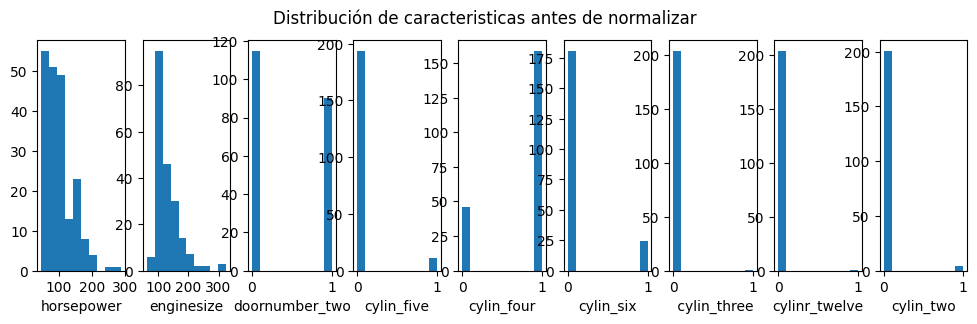

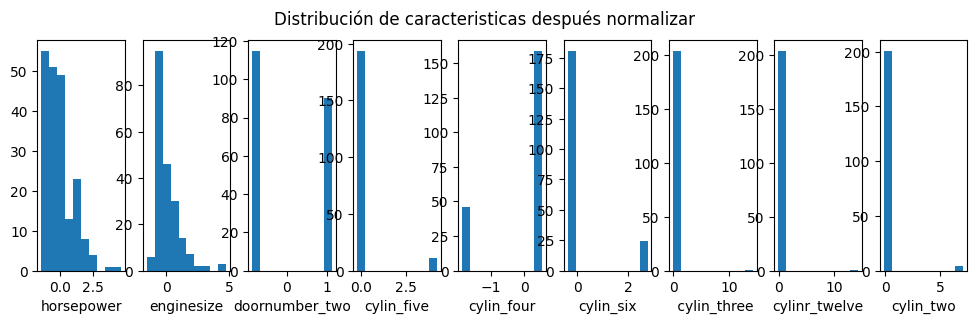

In [129]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
xh_norm = scaler.fit_transform(xh)

fig,ax=plt.subplots(1, 9, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(xh.iloc[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 9, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

In [132]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 8, number of weight updates: 1641.0


In [133]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [12835.72944191], b:[ 1564.39736646  4542.87659495  -735.14434482   467.11225579
 -1268.77836142  -432.83037516 -1111.19388833 -3692.78434153
   482.91722468]


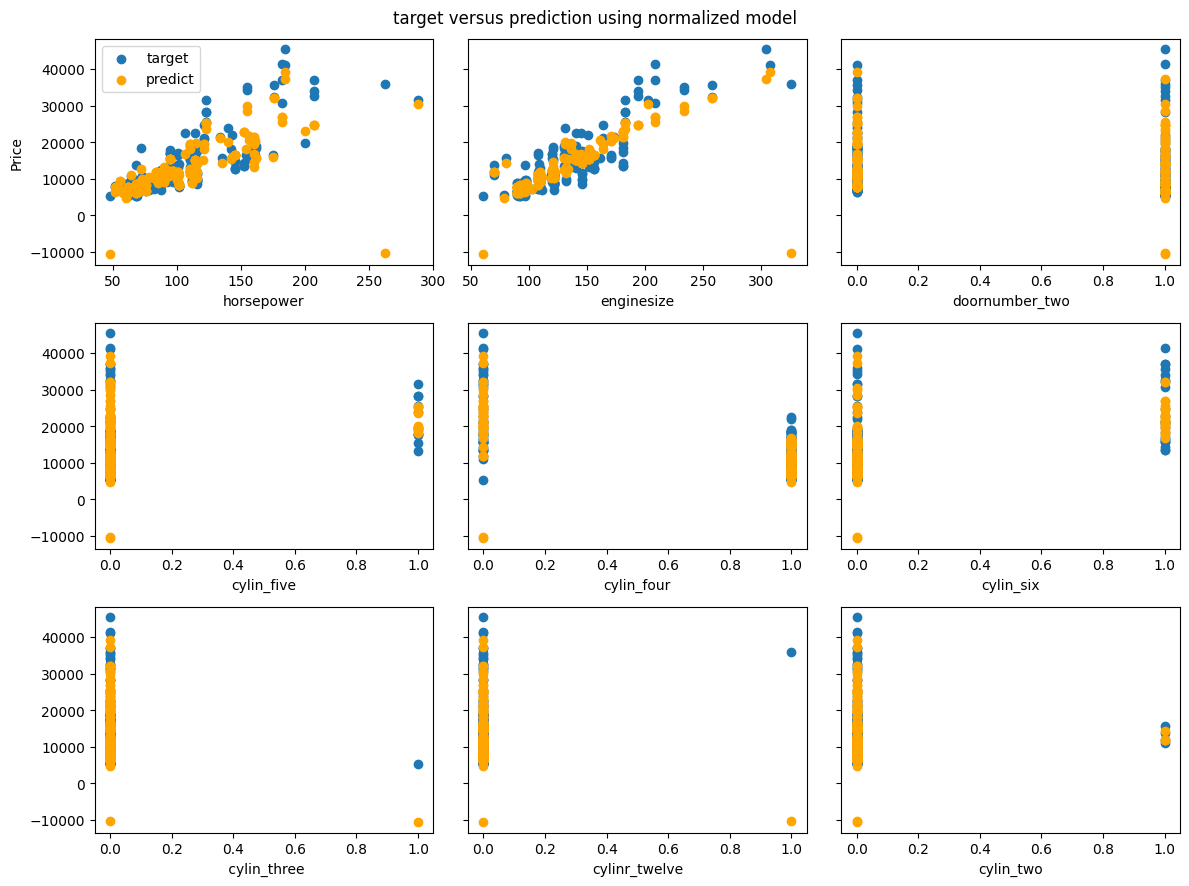

In [138]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*xh_norm[:,i]

# plot predictions and targets versus original features
fig,ax=plt.subplots(3, 3, figsize=(12, 9), sharey=True)
ax = ax.ravel() # this line flattens the array for easy indexing
for i in range(len(ax)):
    ax[i].scatter(xh.iloc[:,i],th, label = 'target')
    ax[i].scatter(xh.iloc[:,i],yp,color="orange", label = 'predict')
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.tight_layout()
plt.show()


In [ ]:
#Split in Train and Test samples.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(xh_norm, th, test_size=0.20, random_state=42)

In [141]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 8, number of weight updates: 1313.0


In [ ]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

In [142]:
#Test score
sgdr.score(X_test,y_test)

0.7819872005757799

In [146]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np

np.random.seed(2)
model = Sequential()

input_dim = 9
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 234501840.0000
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 222653440.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 211645632.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 201400816.0000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 191849760.0000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 182930528.0000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 174587808.0000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 166772000.0000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 159438672.0000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 152548000.0000
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 146064128.0000
Epoch 12/100
1/1 [==============================] 

In [148]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)


[[ 2751.8838 ]
 [ 3087.5059 ]
 [ -531.9947 ]
 [  228.85829]
 [-1367.9722 ]
 [  174.56796]
 [ -803.69714]
 [  -54.31403]
 [  137.27347]] [11484.014]


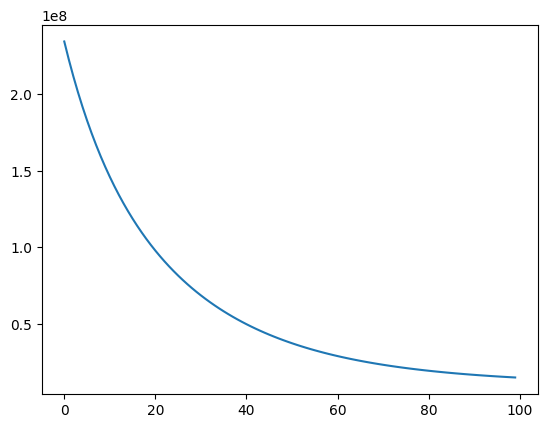

In [149]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [152]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 14795223.0000
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 14642496.0000
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 14495070.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 14352741.0000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 14215326.0000
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 14082638.0000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 13954498.0000
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13830742.0000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13711209.0000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13595737.0000
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 13484176.0000
Epoch 12/100
1/1 [==============================] - 0s 5ms/ste

In [153]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 2895.258  ]
 [ 3819.039  ]
 [ -729.9979 ]
 [  367.3826 ]
 [-1390.4796 ]
 [ -550.434  ]
 [ -912.92737]
 [ -513.3461 ]
 [  320.26086]] [13044.134]


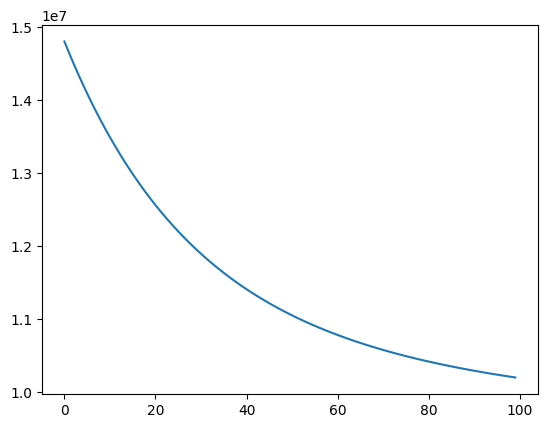

In [154]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();


In [155]:
score = model.evaluate(X_test, y_test, verbose=0)
score

17564682.0